In [23]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [24]:
colors = sns.color_palette("Paired")
colors[0]

(0.6509803921568628, 0.807843137254902, 0.8901960784313725)

In [33]:
# Define bipartite sets and edges
U = [
    "MedCLIP",
    "PLIP",
    "PubMedCLIP",
    "BiomedCLIP",
    "MedSigLIP",
    "LLaVA-Med",
    "Lingshu",
    "MedGemma",
    "o3",
    "Gemini 2.5 Pro",
]  # left partition
V = ["CXP", "VQA-RAD", "SLAKE", "Camelyon", "PathVQA", "HAM", "PAPILA", "GF3300", "FairVLMed"]  # right partition

ID_dict = {
    "MedCLIP": ["CXP"],
    "PubMedCLIP": ["CXP"],
    "BiomedCLIP": ["CXP", "HAM", "Camelyon", "VQA-RAD", "SLAKE", "PathVQA"],
    "PLIP": ["Camelyon", "PathVQA"],
    "MedSigLIP": ["VQA-RAD", "PathVQA", "SLAKE", "CXP", "Camelyon", "HAM", "PAPILA"],
    "LLaVA-Med": [
        "VQA-RAD",
        "PathVQA",
        "SLAKE",
        "CXP",
        "Camelyon",
        "HAM",
    ],
    "MedGemma": ["VQA-RAD", "PathVQA", "SLAKE", "CXP", "Camelyon", "HAM", "PAPILA"],
    "Lingshu": ["VQA-RAD", "PathVQA", "SLAKE", "CXP", "Camelyon", "HAM"],
    "Gemini 2.5 Pro": V,
    "o3": V,
}

edges = []

for k, v in ID_dict.items():
    for data in v:
        edges.append((k, data))

In [35]:
# Define bipartite sets and edges
U = [
    "MedCLIP",
    "PLIP",
    "PubMedCLIP",
    "BiomedCLIP",
    "MedSigLIP",
    # "LLaVA-Med",
    # "Lingshu",
    # "MedGemma",
    # "o3",
    # "Gemini 2.5 Pro",
]  # left partition
V = ["CXP", "Camelyon", "HAM", "PAPILA",
     "GF3300", "FairVLMed"]  # right partition

ID_dict = {
    "MedCLIP": ["CXP"],
    "PubMedCLIP": ["CXP"],
    "BiomedCLIP": ["CXP", "HAM", "Camelyon"],
    "PLIP": ["Camelyon"],
    "MedSigLIP": ["CXP", "Camelyon", "PAPILA", "HAM", "PAPILA"],
}

edges = []

for k, v in ID_dict.items():
    for data in v:
        edges.append((k, data))

In [36]:
import plotly.graph_objects as go

source = []
target = []
colors = []

for edge in edges:
    source.append(U.index(edge[0]))
    target.append(V.index(edge[1]) + len(U))
    c = sns.color_palette("Paired")[U.index(edge[0])]
    c = [int(x * 255) for x in c]
    colors.append(f"rgba({c[0]},{c[1]},{c[2]},0.8)")
print(colors)

value = [1] * len(source)


fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(pad=15, thickness=20, line=dict(
                color="black", width=0.5), label=U + V, color="blue"),
            link=dict(
                # indices correspond to labels, eg A1, A2, A1, B1, ...
                source=source,
                target=target,
                value=value,
                color=colors,
            ),
        )
    ]
)

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

['rgba(166,206,227,0.8)', 'rgba(178,223,138,0.8)', 'rgba(51,160,44,0.8)', 'rgba(51,160,44,0.8)', 'rgba(51,160,44,0.8)', 'rgba(31,120,180,0.8)', 'rgba(251,154,153,0.8)', 'rgba(251,154,153,0.8)', 'rgba(251,154,153,0.8)', 'rgba(251,154,153,0.8)', 'rgba(251,154,153,0.8)']


/tmp/ipykernel_807020/906603635.py:29: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



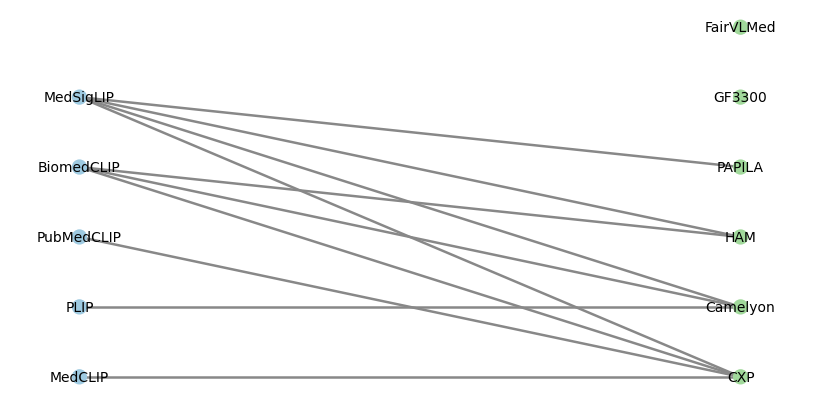

In [32]:
import networkx as nx
import matplotlib.pyplot as plt


# Build graph and set bipartite attribute
B = nx.Graph()
B.add_nodes_from(U, bipartite=0)
B.add_nodes_from(V, bipartite=1)
B.add_edges_from(edges)

# Layout: fixed x by partition, y by bipartite_layout
pos = {}
pos.update((n, (0, i)) for i, n in enumerate(U))  # left column
pos.update((n, (1, i)) for i, n in enumerate(V))  # right column
# Or use: pos = nx.bipartite_layout(B, U)  # auto layout

plt.figure(figsize=(8, 4))
nx.draw(
    B,
    pos,
    with_labels=True,
    node_size=100,
    node_color=["#9ecae1"] * len(U) + ["#a1d99b"] * len(V),
    edge_color="#888",
    width=1.8,
    font_size=10,
)
plt.axis("off")
plt.tight_layout()
plt.show()